In [1]:
import numpy as np
import torchvision.transforms as transforms
from ml.models import EmbeddingNet, SiameseNet
import torch

import preprocess
import matplotlib.pyplot as plt
import cv2

In [2]:
bin_im_1, im_1 = preprocess.process("../data/examples/du_2.jpg")

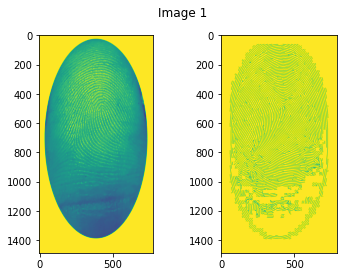

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Image 1')
ax1.imshow(im_1)
ax2.imshow(bin_im_1)

In [8]:
bin_im_2, im_2 = preprocess.process("../data/examples/du_1.jpg")


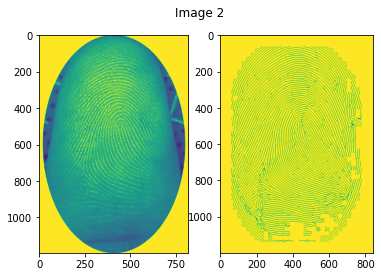

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Image 2')
ax1.imshow(im_2)
ax2.imshow(bin_im_2)


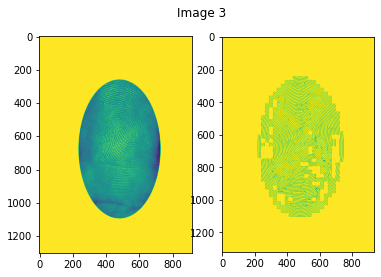

In [24]:
bin_im_3, im_3 = preprocess.process("../data/examples/du_3.jpg")
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Image 3')
ax1.imshow(im_3)
ax2.imshow(bin_im_3)

 ## Matching



In [12]:
embedding_net = EmbeddingNet()
model = SiameseNet(embedding_net)
weights = torch.load("../models/model_siamese.pt",map_location=torch.device('cpu'))
model.load_state_dict(weights)



<All keys matched successfully>

In [25]:
from ml.utils import imshow
import torchvision.utils
to_tensor = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((90,90)),
        transforms.ToTensor()
    ])

Positive Pair

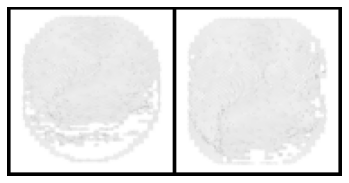

In [22]:
x1 = torch.unsqueeze(to_tensor(bin_im_1 *255),0)
x2 = torch.unsqueeze(to_tensor(bin_im_2 * 255),0)
concat = torch.cat((x1, x2), 0)
imshow(torchvision.utils.make_grid(concat))


In [26]:
output1, output2 = model(x1, x2)
distance = (output2 - output1).pow(2).sum(1)
print("Distance:",distance.item())

Distance: 0.052589550614356995


Negative Pair

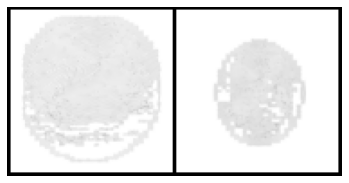

In [27]:
x3 = torch.unsqueeze(to_tensor(bin_im_3 * 255),0)
concat = torch.cat((x1, x3), 0)
imshow(torchvision.utils.make_grid(concat))

In [28]:
output1, output2 = model(x1, x3)
distance = (output2 - output1).pow(2).sum(1)
print("Distance:",distance.item())


Distance: 0.007363718468695879
